# Imports

In [1]:
import sys
import os
import pickle
import numpy as np

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import sexToBinary as sb
import wScore
import boxPlot as bp

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Formatted Layer Neuron Data (NeuN)

### HC

In [4]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'rb') as f:
    NeuN_HC = pickle.load(f)
f.close()

In [5]:
NeuN_HC.shape

(32, 10)

### Tau

In [6]:
# NeuN_Tau
with open(os.path.join(layer_dataDir, 'NeuN_Tau.pkl'), 'rb') as f:
    NeuN_Tau = pickle.load(f)
f.close()

In [7]:
NeuN_Tau.shape

(27, 10)

### TDP

In [8]:
# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'rb') as f:
    NeuN_TDP = pickle.load(f)
f.close()

In [9]:
NeuN_TDP.shape

(47, 10)

## Loading Age, Sex values

In [10]:
# NeuN_HC_Age
with open(os.path.join(layer_dataDir, 'NeuN_HC_Age.pkl'), 'rb') as f:
    NeuN_HC_Age = pickle.load(f)
f.close()
# NeuN_HC_Sex
with open(os.path.join(layer_dataDir, 'NeuN_HC_Sex.pkl'), 'rb') as f:
    NeuN_HC_Sex = pickle.load(f)
f.close()

# NeuN_Tau_Age
with open(os.path.join(layer_dataDir, 'NeuN_Tau_Age.pkl'), 'rb') as f:
    NeuN_Tau_Age = pickle.load(f)
f.close()
# NeuN_Tau_Sex
with open(os.path.join(layer_dataDir, 'NeuN_Tau_Sex.pkl'), 'rb') as f:
    NeuN_Tau_Sex = pickle.load(f)
f.close()

# NeuN_TDP_Age
with open(os.path.join(layer_dataDir, 'NeuN_TDP_Age.pkl'), 'rb') as f:
    NeuN_TDP_Age = pickle.load(f)
f.close()
# NeuN_TDP_Sex
with open(os.path.join(layer_dataDir, 'NeuN_TDP_Sex.pkl'), 'rb') as f:
    NeuN_TDP_Sex = pickle.load(f)
f.close()

# Calculating W-Score

## Format Age Values

In [11]:
ageHC = np.array(NeuN_HC_Age).reshape(-1, 1)
ageTau = np.array(NeuN_Tau_Age).reshape(-1, 1)
ageTDP = np.array(NeuN_TDP_Age).reshape(-1, 1)

## Format Sex Values

In [12]:
sexHC = np.array(NeuN_HC_Sex).reshape(-1, 1)
sexTau = np.array(NeuN_Tau_Sex).reshape(-1, 1)
sexTDP = np.array(NeuN_TDP_Sex).reshape(-1, 1)

# Convert Male --> 0 / Female --> 1
sexHC = np.array(sb.sexToBinary(sexHC)).reshape((-1, 1)) 
sexTau = np.array(sb.sexToBinary(sexTau)).reshape((-1, 1)) 
sexTDP = np.array(sb.sexToBinary(sexTDP)).reshape((-1, 1)) 

## Stack Age, Sex Values

In [13]:
# Stack the Age and Sex features into 2D array
hcCov = np.concatenate((ageHC, sexHC), axis=1) 
tauCov = np.concatenate((ageTau, sexTau), axis=1)  
tdpCov = np.concatenate((ageTDP, sexTDP), axis=1)

## Number of regions we are analyzing (N = 10)

In [14]:
N = NeuN_HC.shape[1]

In [15]:
assert(N == 10)

## Calculate the W-Scores

In [19]:
NeuN_HC_w, NeuN_Tau_w, NeuN_TDP_w = wScore.generateWScore(hcCov, tauCov, tdpCov, N, 
                                                          NeuN_HC, 
                                                          NeuN_Tau, 
                                                          NeuN_TDP)

# Show Data Distribution Before and After W-Score

## Before

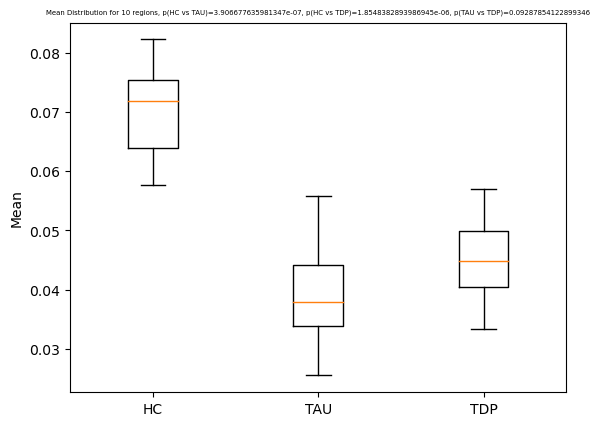

In [17]:
bp.drawthicknessboxplot(NeuN_HC, NeuN_Tau, NeuN_TDP, ['HC', 'TAU', 'TDP'], 'Mean', 
                        "Mean Distribution for 10 regions", layer_Fig, 
                        "Layer_Distribution(NeuN).png")

## After

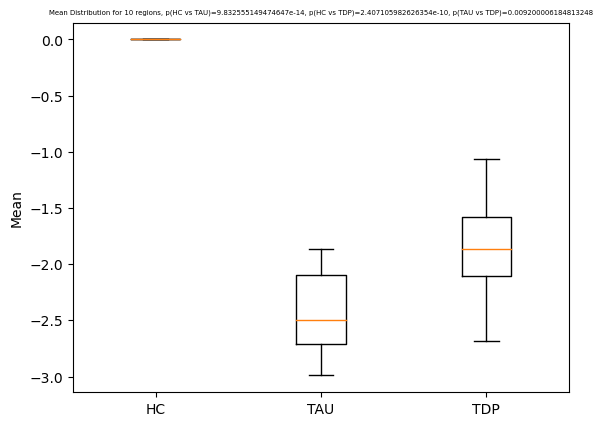

In [18]:
bp.drawthicknessboxplot(NeuN_HC_w, NeuN_Tau_w, NeuN_TDP_w, ['HC', 'TAU', 'TDP'], 'Mean', 
                        "Mean Distribution for 10 regions", layer_Fig, 
                        "Layer_Distribution(NeuN)_WScore.png")

# Saving

In [19]:
# NeuN_HC_w
with open(os.path.join(layer_dataDir, 'NeuN_HC_w.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_w, f)
f.close()

# NeuN_Tau_w
with open(os.path.join(layer_dataDir, 'NeuN_Tau_w.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_w, f)
f.close()

# NeuN_TDP_w
with open(os.path.join(layer_dataDir, 'NeuN_TDP_w.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_w, f)
f.close()